# EDA of processed openFDA drug event data

In [1]:
import os
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

data_dir = "../../data/openFDA_drug_event/"

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Standard mappings

### drugs

In [2]:
drugs = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/drugs.csv.gz',
                 compression='gzip',index_col=0))

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print(drugs.shape)
drugs.head()

(247682846, 2)


,safetyreportid,rxcui
0,10003300,904954
1,10003300,904934
2,10003300,904952
3,10003300,904932
4,10003301,1300267


In [4]:
drugs_reports = drugs.safetyreportid.astype(str).unique()

In [5]:
print(len(drugs_reports))
drugs_reports[:5]

9312520


array(['10003300', '10003301', '10003302', '10003304', '10003305'],
      dtype=object)

In [6]:
drugs_rxcuis = drugs.rxcui.astype(int).unique()

In [7]:
print(len(drugs_rxcuis))
drugs_rxcuis[:5]

17400


array([ 904954,  904934,  904952,  904932, 1300267])

In [8]:
del drugs

In [14]:
standard_drugs = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_drugs.csv.gz',
                 compression='gzip',
                 index_col=0,
                dtype={
                    'safetyreportid' : 'str'
                }))
standard_drugs.head()

,RxNorm_concept_class_id,RxNorm_concept_code,RxNorm_concept_id,RxNorm_concept_name,safetyreportid
0,Clinical Drug,91349,1776544.0,Hydrogen Peroxide 30 MG/ML Topical Solution,10024478
1,Clinical Drug,91349,1776544.0,Hydrogen Peroxide 30 MG/ML Topical Solution,10037760
2,Clinical Drug,91349,1776544.0,Hydrogen Peroxide 30 MG/ML Topical Solution,10162316
3,Clinical Drug,91349,1776544.0,Hydrogen Peroxide 30 MG/ML Topical Solution,10235601
4,Clinical Drug,91349,1776544.0,Hydrogen Peroxide 30 MG/ML Topical Solution,10284414


In [15]:
print(standard_drugs.shape)

(245577694, 5)


In [16]:
standard_drugs_reports = standard_drugs.safetyreportid.astype(str).unique()

In [17]:
print(len(standard_drugs_reports))

9312077


In [18]:
print(standard_drugs.RxNorm_concept_id.nunique())
print(standard_drugs.RxNorm_concept_code.nunique())

17073
17073


In [19]:
standard_drugs_rxids = standard_drugs.RxNorm_concept_id.dropna().astype(int).unique()
standard_drugs_rxcuis = standard_drugs.RxNorm_concept_code.dropna().astype(int).unique()

In [20]:
del standard_drugs

In [21]:
print(len(standard_drugs_reports)/len(drugs_reports))

0.9999524296323659


In [22]:
print(len(np.intersect1d(standard_drugs_rxcuis,drugs_rxcuis))/len(drugs_rxcuis))
print(len(np.intersect1d(standard_drugs_rxcuis,drugs_rxcuis))/len(standard_drugs_rxcuis))

0.9812068965517241
1.0


In [19]:
standard_drugs_atc = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_drugs_atc.csv.gzip',
                 compression='gzip',index_col=0))
print(standard_drugs_atc.shape)
print(standard_drugs_atc.head())
tmp = standard_drugs_atc[['RxNorm_concept_id','ATC_concept_id']].drop_duplicates()
print(tmp.shape)
tmp = tmp[tmp.RxNorm_concept_id.notnull()]
print(tmp.shape)
print(tmp.shape)
print(tmp.dropna().shape)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(167607408, 10)
  ATC_concept_class_id ATC_concept_code  ATC_concept_id ATC_concept_name  \
0              ATC 5th          N05AC02        21604512     thioridazine   
1              ATC 5th          N05AC02        21604512     thioridazine   
2              ATC 5th          N05AC02        21604512     thioridazine   
3              ATC 5th          N05AC02        21604512     thioridazine   
4              ATC 5th          N05AC02        21604512     thioridazine   

  RxNorm_concept_class_id  RxNorm_concept_code  RxNorm_concept_id  \
0           Clinical Drug               198274             700325   
1           Clinical Drug               198274             700325   
2           Clinical Drug               198274             700325   
3           Clinical Drug               198274             700325   
4           Clinical Drug               198274             700325   

              RxNorm_concept_name      relationship_id safetyreportid  
0  Thioridazine 25 MG Oral Tablet  Drug 

In [21]:
standard_drugs_atc_reports = standard_drugs_atc.safetyreportid.astype(str).unique()

In [22]:
del standard_drugs_atc

In [23]:
standard_drugs_rxnorm_ingredients = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_drug_rxnorm_ingredients.csv.gzip',
                 compression='gzip',index_col=0))

In [25]:
standard_drugs_rxnorm_ingredients.head()

,safetyreportid,RxNorm_concept_id,RxNorm_concept_code,RxNorm_concept_name,RxNorm_concept_class_id
700325,11660526,700299.0,10502.0,Thioridazine,Ingredient
700325,11837467,700299.0,10502.0,Thioridazine,Ingredient
700325,12445546,700299.0,10502.0,Thioridazine,Ingredient
700325,13059492,700299.0,10502.0,Thioridazine,Ingredient
700325,13360543,700299.0,10502.0,Thioridazine,Ingredient


In [26]:
standard_drugs_rxnorm_ingredients_reports = (standard_drugs_rxnorm_ingredients.
                                             safetyreportid.astype(str).unique()
                                            )

In [27]:
print(len(standard_drugs_rxnorm_ingredients_reports))
print(len(drugs_reports))
print(len(np.intersect1d(standard_drugs_rxnorm_ingredients_reports,drugs_reports))/ \
      len(drugs_reports))

9312077
9312520
0.9999524296323659


In [28]:
del standard_drugs_rxnorm_ingredients

### reactions

In [48]:
reactions = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/reactions.csv.gz',
                 compression='gzip',
                 index_col=0,
                 dtype={
                     'safetyreportid' : 'str',
                 }))
reactions.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,safetyreportid,reaction_meddrapt,reaction_outcome
0,10003300,Headache,NaN
1,10003300,Arthralgia,NaN
2,10003300,Diarrhoea,NaN
3,10003300,Vomiting,NaN
4,10003301,Dyspepsia,NaN


In [54]:
reactions_meddraptnames = reactions.reaction_meddrapt.dropna().astype(str).str.title().unique()
print(len(reactions_meddraptnames))
reactions_meddraptnames[:5]

21099


array(['Headache', 'Arthralgia', 'Diarrhoea', 'Vomiting', 'Dyspepsia'],
      dtype=object)

In [55]:
reactions_reports = reactions.safetyreportid.unique()

In [56]:
print(len(reactions_reports))

10392389


In [57]:
del reactions

In [59]:
standard_reactions = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_reactions.csv.gz',
                 compression='gzip',
                 index_col=0,
                 dtype={
                     'safetyreportid' : 'str',
                     'MedDRA_concept_id' : 'int',
                     'MedDRA_concept_code' : 'int'
                 }))
standard_reactions.head()

,MedDRA_concept_name,safetyreportid,reaction_outcome,MedDRA_concept_id,MedDRA_concept_code,MedDRA_concept_class_id
0,11-Beta-Hydroxylase Deficiency,7999037-5,NaN,35305836,10000002,PT
1,17 Ketosteroids Urine Abnormal,13978283,Recovered/resolved,36312356,10061608,PT
2,17 Ketosteroids Urine Abnormal,13983944,Recovered/resolved,36312356,10061608,PT
3,17 Ketosteroids Urine Abnormal,13988153,Recovered/resolved,36312356,10061608,PT
4,17 Ketosteroids Urine Abnormal,13993404,Recovered/resolved,36312356,10061608,PT


In [60]:
standard_reactions.MedDRA_concept_class_id.value_counts()

PT    30461034
Name: MedDRA_concept_class_id, dtype: int64

In [61]:
standard_reactions_reports = standard_reactions.safetyreportid.unique()

In [62]:
len(standard_reactions_reports)

10288539

In [63]:
len(standard_reactions_reports)/len(reactions_reports)

0.9900071100109897

In [64]:
standard_reactions_meddraptids = standard_reactions.MedDRA_concept_id.unique()
standard_reactions_meddraptnames = standard_reactions.MedDRA_concept_name.unique()
print(len(standard_reactions_meddraptnames))
standard_reactions_meddraptnames[:5]

18661


array(['11-Beta-Hydroxylase Deficiency', '17 Ketosteroids Urine Abnormal',
       '17 Ketosteroids Urine Decreased',
       '17-Alpha-Hydroxylase Deficiency',
       '17-Hydroxyprogesterone Decreased'], dtype=object)

In [65]:
del standard_reactions

In [66]:
reactions_meddraptnames

array(['Headache', 'Arthralgia', 'Diarrhoea', ..., 'Antimetropia',
       'Non-Hodgkin^S Lymphoma Unspecified Histology Indolent Stage Iv',
       'Leukoplakia Of Penis'], dtype=object)

In [67]:
print(len(np.intersect1d(standard_reactions_meddraptnames,reactions_meddraptnames))/ \
      len(reactions_meddraptnames))
print(len(np.intersect1d(standard_reactions_meddraptnames,reactions_meddraptnames))/ \
      len(standard_reactions_meddraptnames))

0.8844494999763022
1.0


In [34]:
standard_reactions_meddra_hlt = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_reactions_meddra_hlt.csv.gz',
                 compression='gzip',index_col=0,
                 dtype={
                     'safetyreportid' : 'str',
                     'MedDRA_concept_id' : 'int',
                     'MedDRA_concept_code' : 'int'
                 }))
standard_reactions_meddra_hlt.head()

,safetyreportid,MedDRA_concept_id,MedDRA_concept_code,MedDRA_concept_name,MedDRA_concept_class_id
0,12319163,37003657,10005037,Bladder disorders NEC,HLT
1,13726679,37003657,10005037,Bladder disorders NEC,HLT
2,12319163,37503912,10028752,Nasal therapeutic procedures,HLT
3,12779257,37503912,10028752,Nasal therapeutic procedures,HLT
4,13585856,37503912,10028752,Nasal therapeutic procedures,HLT


In [35]:
standard_reactions_meddra_hlt_reports = standard_reactions_meddra_hlt.safetyreportid.unique()

In [39]:
print(len(standard_reactions_meddra_hlt_reports))

10287519


In [40]:
len(standard_reactions_meddra_hlt_reports)/len(reactions_reports)

0.9899089612600144

In [80]:
del standard_reactions_meddra_hlt

In [38]:
standard_reactions_meddra_hlgt = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_reactions_meddra_hlgt.csv.gz',
                 compression='gzip',index_col=0,
                 dtype={
                     'safetyreportid' : 'str',
                     'MedDRA_concept_id' : 'int',
                     'MedDRA_concept_code' : 'int'
                 }))
standard_reactions_meddra_hlgt.head()

,safetyreportid,MedDRA_concept_id,MedDRA_concept_code,MedDRA_concept_name,MedDRA_concept_class_id
0,12319163,37002286,10004994,Bladder and bladder neck disorders (excl calculi),HLGT
1,13726679,37002286,10004994,Bladder and bladder neck disorders (excl calculi),HLGT
2,12319163,37502343,10019190,Head and neck therapeutic procedures,HLGT
3,12779257,37502343,10019190,Head and neck therapeutic procedures,HLGT
4,13585856,37502343,10019190,Head and neck therapeutic procedures,HLGT


In [41]:
standard_reactions_meddra_hlgt_reports = standard_reactions_meddra_hlgt.safetyreportid.unique()

In [42]:
print(len(standard_reactions_meddra_hlgt_reports))

10287519


In [43]:
len(standard_reactions_meddra_hlgt_reports)/len(reactions_reports)

0.9899089612600144

In [79]:
del standard_reactions_meddra_hlgt

In [44]:
standard_reactions_meddra_soc = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/standard_reactions_meddra_soc.csv.gz',
                 compression='gzip',index_col=0,
                 dtype={
                     'safetyreportid' : 'str',
                     'MedDRA_concept_id' : 'int',
                     'MedDRA_concept_code' : 'int'
                 }
                ))
standard_reactions_meddra_soc.head()

,safetyreportid,MedDRA_concept_id,MedDRA_concept_code,MedDRA_concept_name,MedDRA_concept_class_id
0,12319163,37000000,10038359,Renal and urinary disorders,SOC
1,13726679,37000000,10038359,Renal and urinary disorders,SOC
2,12319163,37500000,10042613,Surgical and medical procedures,SOC
3,12779257,37500000,10042613,Surgical and medical procedures,SOC
4,13585856,37500000,10042613,Surgical and medical procedures,SOC


In [45]:
standard_reactions_meddra_soc_reports = standard_reactions_meddra_soc.safetyreportid.unique()

In [46]:
print(len(standard_reactions_meddra_soc_reports))

10287519


In [47]:
len(standard_reactions_meddra_soc_reports)/len(reactions_reports)

0.9899089612600144

In [78]:
del standard_reactions_meddra_soc

In [70]:
standard_reactions_snomed = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/'+
                 'standard_reactions_snomed.csv.gz',
                 compression='gzip',index_col=0,
                 dtype={
                     'safetyreportid' : 'str',
                     'SNOMED_concept_id' : 'int',
                     'SNOMED_concept_code' : 'int'
                 }
                ))
standard_reactions_snomed.head()

,SNOMED_concept_class_id,SNOMED_concept_code,SNOMED_concept_id,SNOMED_concept_name,reaction_outcome,safetyreportid
0,Clinical Finding,85649008,440977,Megaloblastic anemia due to folate deficiency,Unknown,10590475
1,Clinical Finding,85649008,440977,Megaloblastic anemia due to folate deficiency,Not recovered/not resolved,10590516
2,Clinical Finding,85649008,440977,Megaloblastic anemia due to folate deficiency,Recovered/resolved,10596674
3,Clinical Finding,85649008,440977,Megaloblastic anemia due to folate deficiency,Unknown,10991215
4,Clinical Finding,85649008,440977,Megaloblastic anemia due to folate deficiency,Unknown,11109819


In [73]:
standard_reactions_snomed_reports = (standard_reactions_snomed.safetyreportid.unique())
len(standard_reactions_snomed_reports)

8927224

In [74]:
len(np.intersect1d(standard_reactions_snomed_reports,reactions_reports))/ \
len(reactions_reports)

0.8590155738011731

In [75]:
del standard_reactions_meddrapt_to_snomed

## Number of reports over the years

In [4]:
report = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/report.csv.gzip',
                 compression='gzip',index_col=0))
report.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,safetyreportid,lastupdate_date,mostrecent_receive_date,receive_date
0,10003300,20141002,20140306,20140306
1,10003301,20141002,20140228,20140228
2,10003302,20141002,20140312,20140312
3,10003304,20141212,20140424,20140312
4,10003305,20141002,20140312,20140312


In [42]:
report.receive_date = pd.to_datetime(report.receive_date,format='%Y%m%d')
report['Year'] = report.receive_date.apply(lambda x : x.year)

In [ ]:
import matplotlib.dates as mdates

Text(0.5, 0, '')

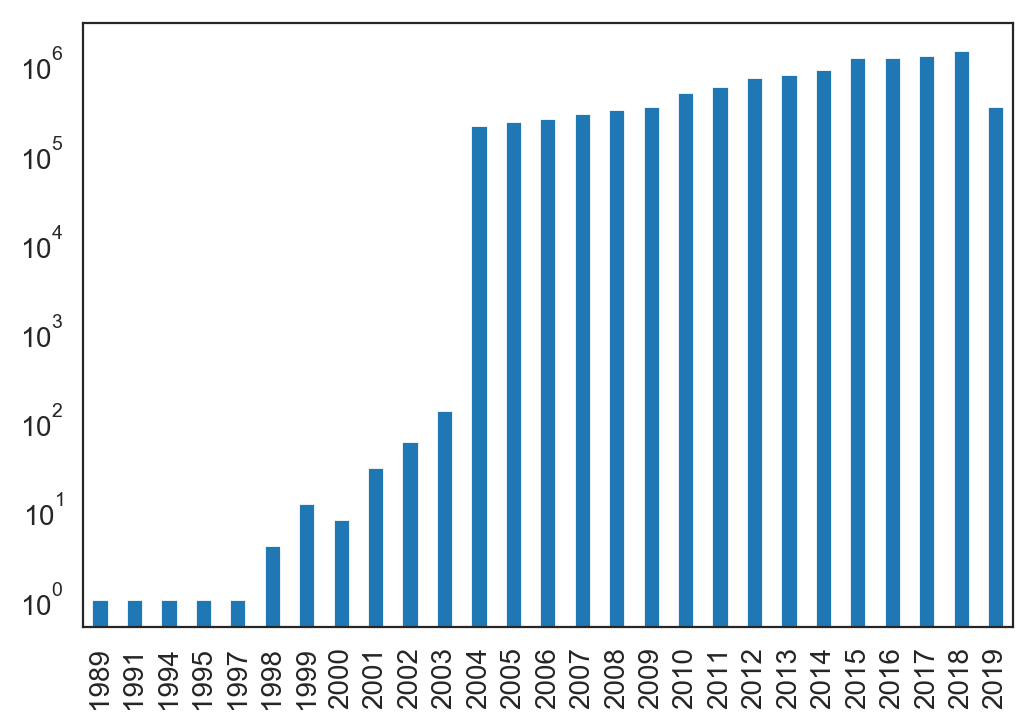

In [49]:
nreportoverdates = (report.
                    groupby('Year').
                    safetyreportid.
                    count()
                   )
nreportoverdates.head()
fig,ax = plt.subplots(dpi=200)
nreportoverdates.plot(kind='bar',ax=ax)
ax.set_yscale('log')
ax.set_xlabel('')

In [52]:
patient = (pd.
        read_csv('../../data/openFDA_drug_event/er_tables/patient.csv.gzip',
                 compression='gzip',index_col=0))
patient.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,safetyreportid,patient_onsetage,patient_onsetageunit,patient_custom_master_age,patient_sex,patient_weight
0,10003300,77.0,Year,77.0,Female,NaN
1,10003301,NaN,NaN,NaN,Female,NaN
2,10003302,NaN,NaN,NaN,Male,NaN
3,10003304,NaN,NaN,NaN,Female,NaN
4,10003305,48.0,Year,48.0,Female,NaN


In [53]:
ped_reports = (patient.
               query('patient_custom_master_age>0 & patient_custom_master_age<18').
               safetyreportid.unique()
              )

Text(0.5, 0, '')

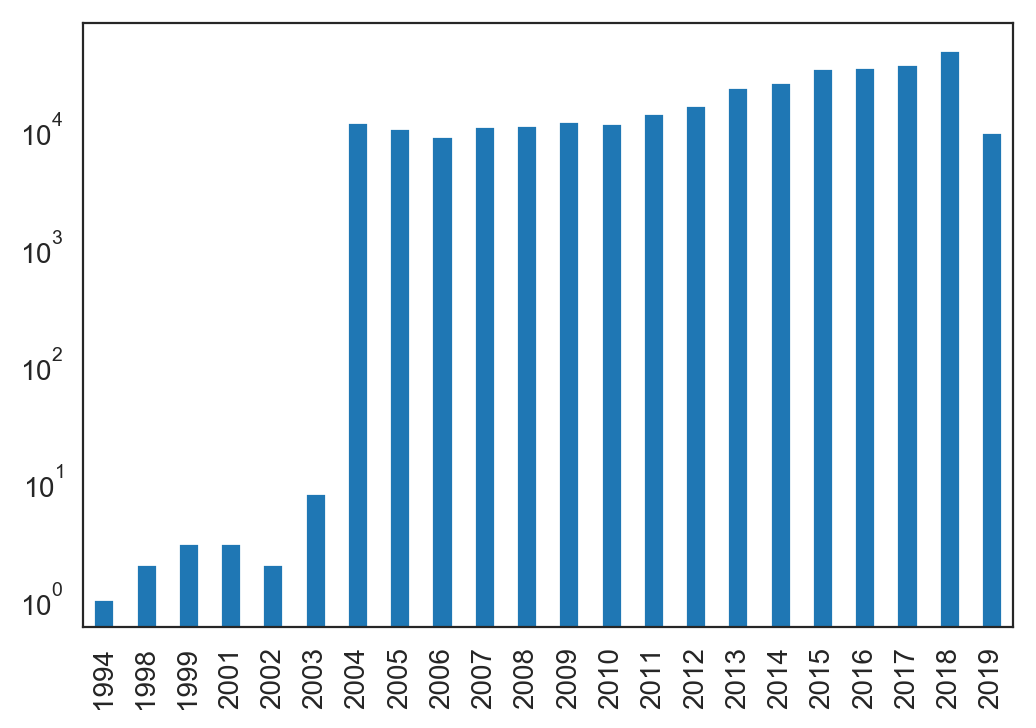

In [55]:
npedreportoverdates = (report.
                    query('safetyreportid in @ped_reports').
                    groupby('Year').
                    safetyreportid.
                    count()
                   )
fig,ax = plt.subplots(dpi=200)
npedreportoverdates.plot(kind='bar',ax=ax)
ax.set_yscale('log')
ax.set_xlabel('')

## Age distribution

In [14]:
patient_df = (pd.
              read_csv('../../data/openFDA_drug_event/er_tables/patient.csv.gzip',
                       compression="gzip",index_col=0))
patient_df.head()

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,safetyreportid,patient_onsetage,patient_onsetageunit,patient_custom_master_age,patient_sex,patient_weight
0,10003300,77.0,Year,77.0,Female,NaN
1,10003301,NaN,NaN,NaN,Female,NaN
2,10003302,NaN,NaN,NaN,Male,NaN
3,10003304,NaN,NaN,NaN,Female,NaN
4,10003305,48.0,Year,48.0,Female,NaN


In [15]:
col = 'patient_custom_master_age'
display(patient_df[col].astype(float).dropna().shape[0])

5840942

In [16]:
values = patient_df.groupby('safetyreportid')[col].agg('mean').dropna().values

In [17]:
print(len(values))
print(len(values)/patient_df.shape[0])

5840942
0.5620403547249819


In [18]:
gt_100 = values>100
sum(gt_100)

767

In [19]:
gt_115 = values>115
sum(gt_115)

60

In [20]:
lt_0 = values<0
sum(lt_0)

0

In [21]:
eq_0 = values==0
sum(eq_0)

8316

In [22]:
eq_100 = values==100
sum(eq_100)

872

In [23]:
lt_100 = values<100
gt_0 = values>0
num = sum(np.logical_and(gt_0,lt_100))
print(num)
num/len(values)

5830987


0.9982956516260562

In [24]:
lt_18 = values<18
num = sum(np.logical_and(gt_0,lt_18))
print(num)
num/len(values)

316462


0.05417995932847818

In [25]:
gtoeq_18 = values>=18
num = sum(np.logical_and(gtoeq_18,lt_100))
print(num)
num/len(values)

5514525


0.9441156922975781

In [26]:
sensical_values = values[np.logical_and(gt_0,lt_100)]

In [27]:
integer_year_counts = np.unique(np.floor(sensical_values),return_counts=True)
integer_year_counts

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
        91., 92., 93., 94., 95., 96., 97., 98., 99.]),
 array([ 31076,  15534,  13901,  12533,  11748,  11839,  12675,  13053,
         13791,  14128,  15049,  14742,  16813,  18124,  21264,  23643,
         27363,  29186,  28441,  29817,  31973,  32173,  33878,  35529,
         37199,  39853,  39965,  41550,  43590,  44068,  52581,  46315,
         49512,  48919,  50960,  56405,  53191,  54811,  56578,  56780,
         69955,  59899,  66008,  67370,  69274,  79104,  76787,  82334,
  

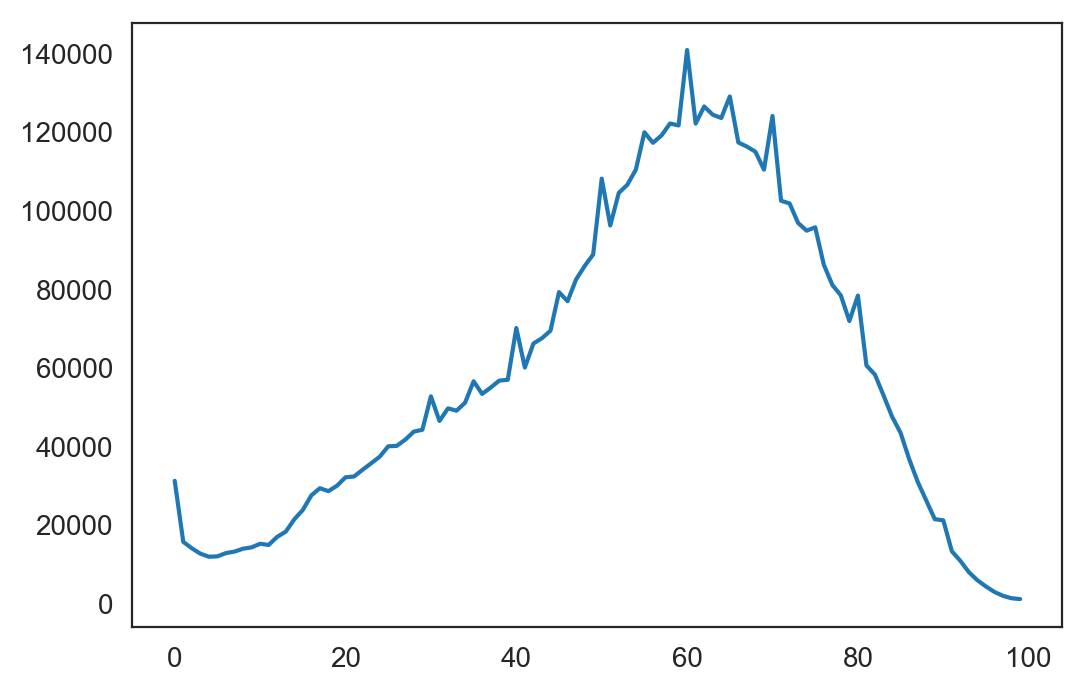

In [28]:
plt.figure(dpi=200)
plt.plot(integer_year_counts[0],integer_year_counts[1])

([<matplotlib.axis.XTick at 0x1a1cec5160>,
 <a list of 19 Text xticklabel objects>)

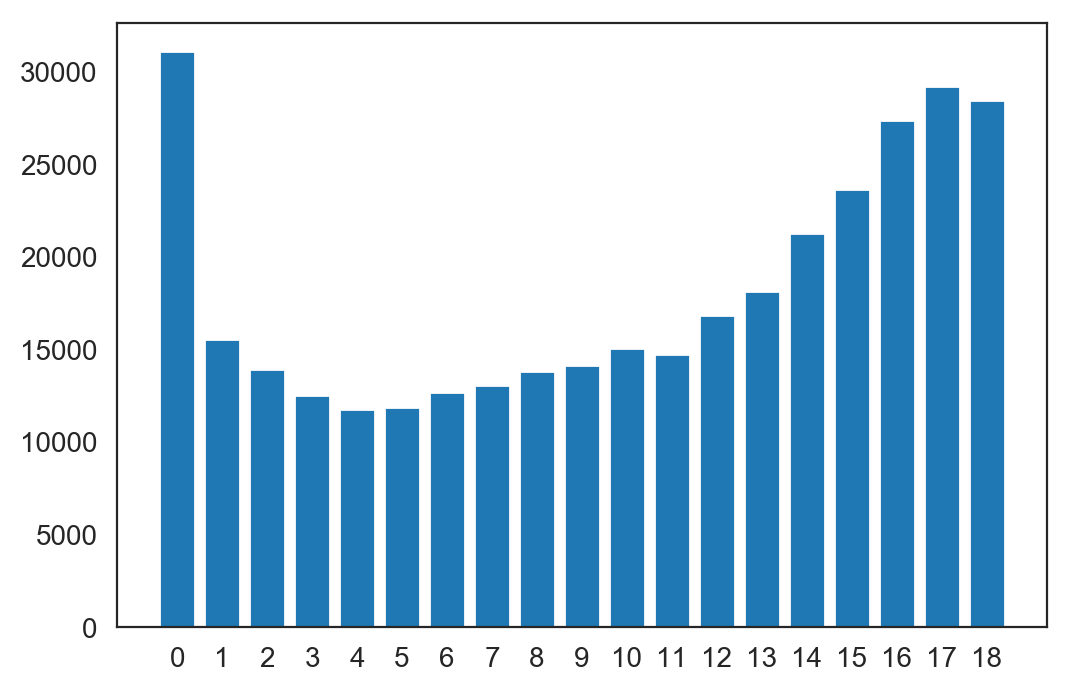

In [29]:
plt.figure(dpi=200)
plt.bar(integer_year_counts[0][:19],integer_year_counts[1][:19])
plt.xticks(integer_year_counts[0][:19])

## Age units used across childhood

patient_custom_master_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
patient_onsetageunit,,,,,,,,,,,,,,,,,,
Decade,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Year,0.00,0.38,0.76,0.94,0.97,0.98,0.99,0.99,0.99,0.99,0.98,0.99,1.0,1.0,1.0,1.0,1.0,1.0
Month,0.55,0.61,0.23,0.05,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Week,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Day,0.35,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Hour,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


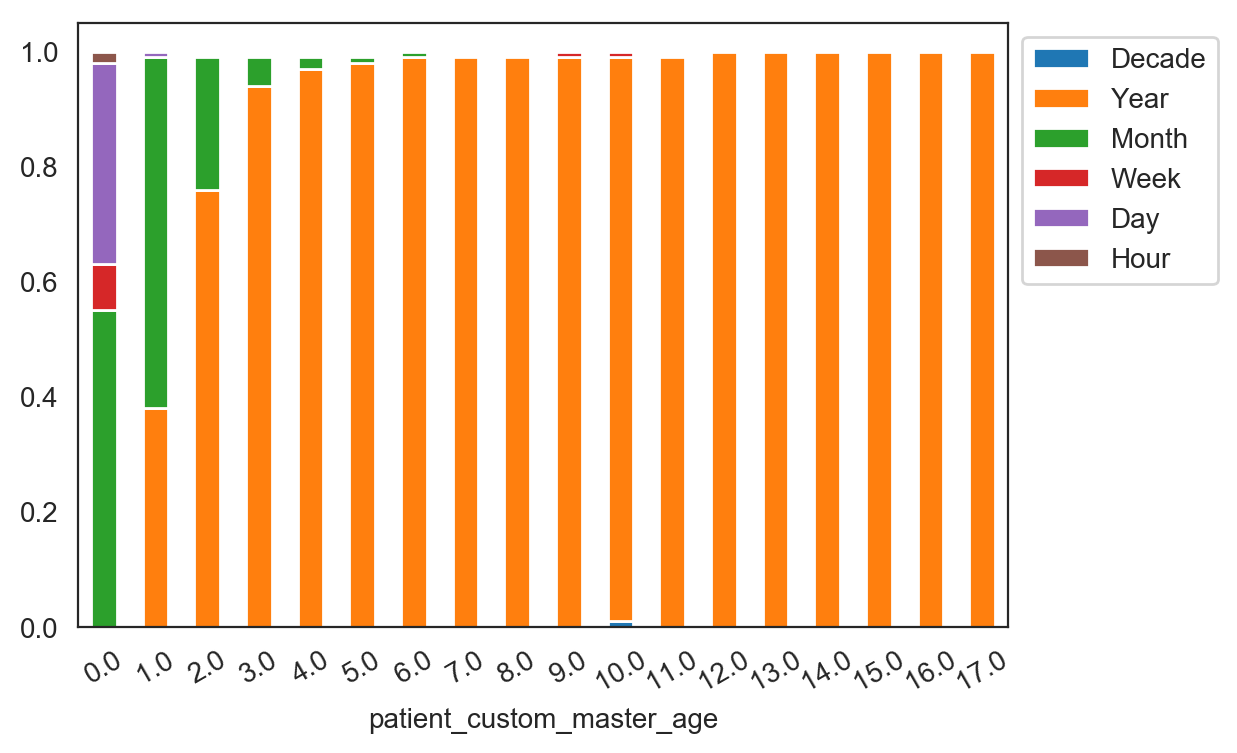

In [32]:
pediatric_patient_df = (patient_df.
                        query('patient_custom_master_age>0 & patient_custom_master_age<18'))
df = pediatric_patient_df[['patient_onsetageunit','patient_custom_master_age']].query('patient_custom_master_age<18').copy()
df['patient_custom_master_age'] = np.floor(df['patient_custom_master_age'])
df['mem'] = 1.
df_pivot = df.pivot_table(index='patient_custom_master_age',columns='patient_onsetageunit',
                          values='mem',aggfunc=sum,fill_value=0)
order=['Decade','Year','Month','Week','Day','Hour']
df_pivot = df_pivot[order].apply(lambda x : x / sum(x),axis=1).round(2)
display(df_pivot.T)
fig,ax=plt.subplots(dpi=200)
g = df_pivot.plot(kind='bar',stacked=True,ax=ax)
g.legend(bbox_to_anchor=(1,1))
g = g.set_xticklabels(g.get_xticklabels(),rotation=30)

## NDrugindications across childhood

In [3]:
drugcharacteristics = (pd.
                       read_csv('../../data/openFDA_drug_event/er_tables/drugcharacteristics.csv.gzip',
                               compression='gzip',
                               index_col=0)
                      )
drugcharacteristics.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,safetyreportid,medicinal_product,drug_characterization,drug_administration,drug_indication
0,14646783,LANITOP,Concomitant (the drug was reported as being ta...,Oral,ATRIAL FIBRILLATION
1,14646783,BELOC ZOK MITE,Concomitant (the drug was reported as being ta...,Oral,ATRIAL FIBRILLATION
2,14646783,PRAXBIND,Suspect (the drug was considered by the report...,Oral,SHOCK HAEMORRHAGIC
3,14646783,LANITOP,Concomitant (the drug was reported as being ta...,NaN,ATRIAL FIBRILLATION
4,14646783,LANITOP,Concomitant (the drug was reported as being ta...,NaN,CARDIAC FAILURE


In [4]:
patients = (pd.
            read_csv('../../data/openFDA_drug_event/er_tables/patient.csv.gzip',
                     compression='gzip',
                     index_col=0)
           )
patients.head()

,safetyreportid,patient_onsetage,patient_onsetageunit,patient_custom_master_age,patient_sex,patient_weight
0,10003300,77.0,Year,77.0,Female,NaN
1,10003301,NaN,NaN,NaN,Female,NaN
2,10003302,NaN,NaN,NaN,Male,NaN
3,10003304,NaN,NaN,NaN,Female,NaN
4,10003305,48.0,Year,48.0,Female,NaN


In [5]:
patient_drugcharacteristics = (patients.
                               set_index('safetyreportid').
                               join(drugcharacteristics.
                               set_index('safetyreportid')
                                   )
                              )
patient_drugcharacteristics.head()

,patient_onsetage,patient_onsetageunit,patient_custom_master_age,patient_sex,patient_weight,medicinal_product,drug_characterization,drug_administration,drug_indication
safetyreportid,,,,,,,,,
8760265,36.0,Year,36.0,Female,NaN,NaN,NaN,NaN,NaN
8760266,NaN,NaN,NaN,Female,142.31,NaN,NaN,NaN,NaN
8760267,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN
8760268,21.0,Year,21.0,Female,NaN,NaN,NaN,NaN,NaN
8760269,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN


In [8]:
pediatric_patient_df = (patient_drugcharacteristics.
                        loc[:,['patient_custom_master_age','drug_indication']].
                        dropna().
                        query('patient_custom_master_age>0 & patient_custom_master_age<25').
                        reset_index()
                       )
pediatric_patient_df['year'] = np.floor(pediatric_patient_df.patient_custom_master_age).astype(int)

Text(0, 0.5, 'Age')

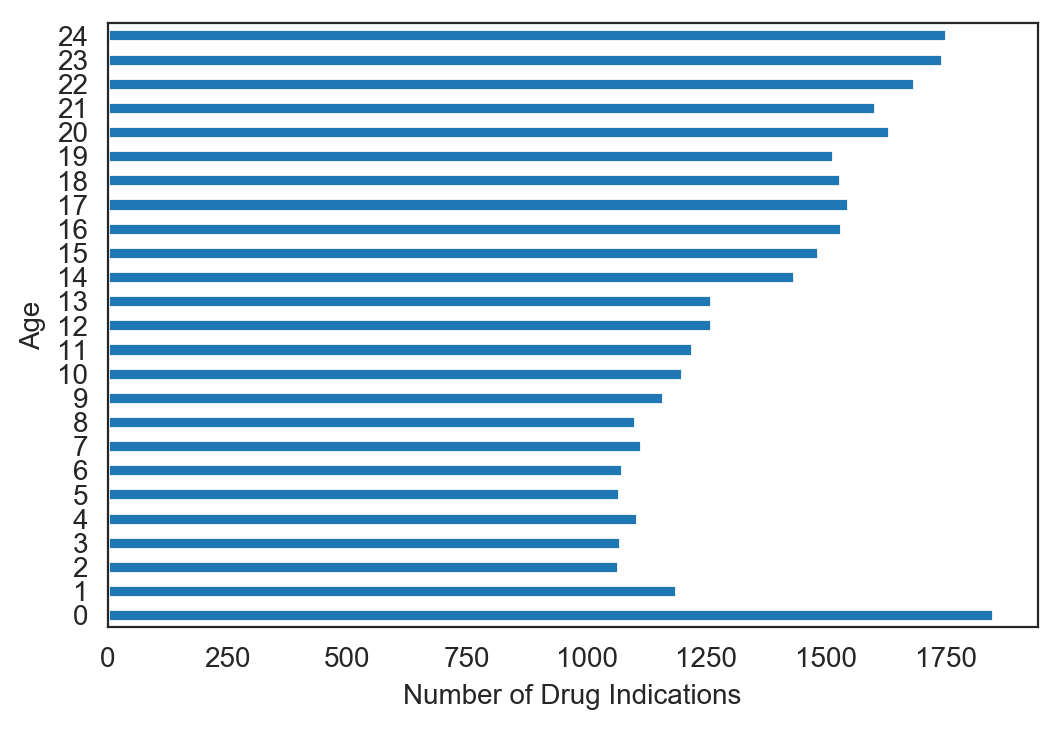

In [9]:
fig,ax = plt.subplots(dpi=200)
(pediatric_patient_df.
 loc[:,['year','drug_indication']].
 drop_duplicates().
 groupby('year')['drug_indication'].
 count()
).plot.barh(ax=ax)
ax.set_xlabel('Number of Drug Indications')
ax.set_ylabel('Age')

## NDrugs across childhood

In [73]:
pediatric_patients = (pd.
            read_csv('../../data/openFDA_drug_event/er_tables/patient.csv.gzip',
                     compression='gzip',
                     index_col=0)
           ).query('patient_custom_master_age<25')
pediatric_patients.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,safetyreportid,patient_onsetage,patient_onsetageunit,patient_custom_master_age,patient_sex,patient_weight
39,10003340,22.0,Year,22.0,Female,NaN
56,10003357,10.0,Year,10.0,Male,28.0
86,10003388,19.0,Year,19.0,Female,NaN
99,10003401,18.0,Year,18.0,Female,NaN
128,10003430,10.0,Year,10.0,Male,NaN


In [74]:
ped_reports = pediatric_patients.safetyreportid.astype(str).unique()
len(ped_reports)

553788

In [75]:
pediatric_standard_drugs = (pd.
                  read_csv('../../data/openFDA_drug_event/er_tables/standard_drugs.csv.gzip',
                           compression='gzip',
                           index_col=0)
                      ).query('safetyreportid in @ped_reports')
pediatric_standard_drugs.safetyreportid = pediatric_standard_drugs.safetyreportid.astype(str) 
pediatric_standard_drugs.RxNorm_concept_id = pediatric_standard_drugs.RxNorm_concept_id.astype(int)
pediatric_standard_drugs.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RxNorm_concept_class_id,RxNorm_concept_code,RxNorm_concept_id,RxNorm_concept_name,safetyreportid
1,Clinical Drug,91349,1776544,Hydrogen Peroxide 30 MG/ML Topical Solution,10037760
6,Clinical Drug,91349,1776544,Hydrogen Peroxide 30 MG/ML Topical Solution,10403090
7,Clinical Drug,91349,1776544,Hydrogen Peroxide 30 MG/ML Topical Solution,10417567
8,Clinical Drug,91349,1776544,Hydrogen Peroxide 30 MG/ML Topical Solution,10434099
38,Clinical Drug,91349,1776544,Hydrogen Peroxide 30 MG/ML Topical Solution,12963875


In [76]:
pediatric_patient_drugs = (pediatric_patients.
                           loc[:,['patient_custom_master_age','safetyreportid']].
                           drop_duplicates().
                           set_index('safetyreportid').
                           join(pediatric_standard_drugs.
                                set_index('safetyreportid')
                               ).
                           dropna()
                          )
pediatric_patient_drugs.RxNorm_concept_id = pediatric_patient_drugs.RxNorm_concept_id.astype(int)
pediatric_patient_drugs.RxNorm_concept_code = pediatric_patient_drugs.RxNorm_concept_code.astype(int)
pediatric_patient_drugs['year'] = np.floor(pediatric_patient_drugs.patient_custom_master_age).astype(int)
pediatric_patient_drugs.head()

,patient_custom_master_age,RxNorm_concept_class_id,RxNorm_concept_code,RxNorm_concept_id,RxNorm_concept_name,year
safetyreportid,,,,,,
16103222,19.0,Branded Drug,105899,19008027,Naproxen 500 MG Oral Tablet [Naprosyn],19.0
16103222,19.0,Clinical Drug,198012,19019271,Naproxen 375 MG Oral Tablet,19.0
16103222,19.0,Clinical Drug,198013,19019272,Naproxen 250 MG Oral Tablet,19.0
16103222,19.0,Clinical Drug,198014,19019273,Naproxen 500 MG Oral Tablet,19.0
16103222,19.0,Branded Drug,207093,19034478,Naproxen 25 MG/ML Oral Suspension [Naprosyn],19.0


Text(0, 0.5, 'Age')

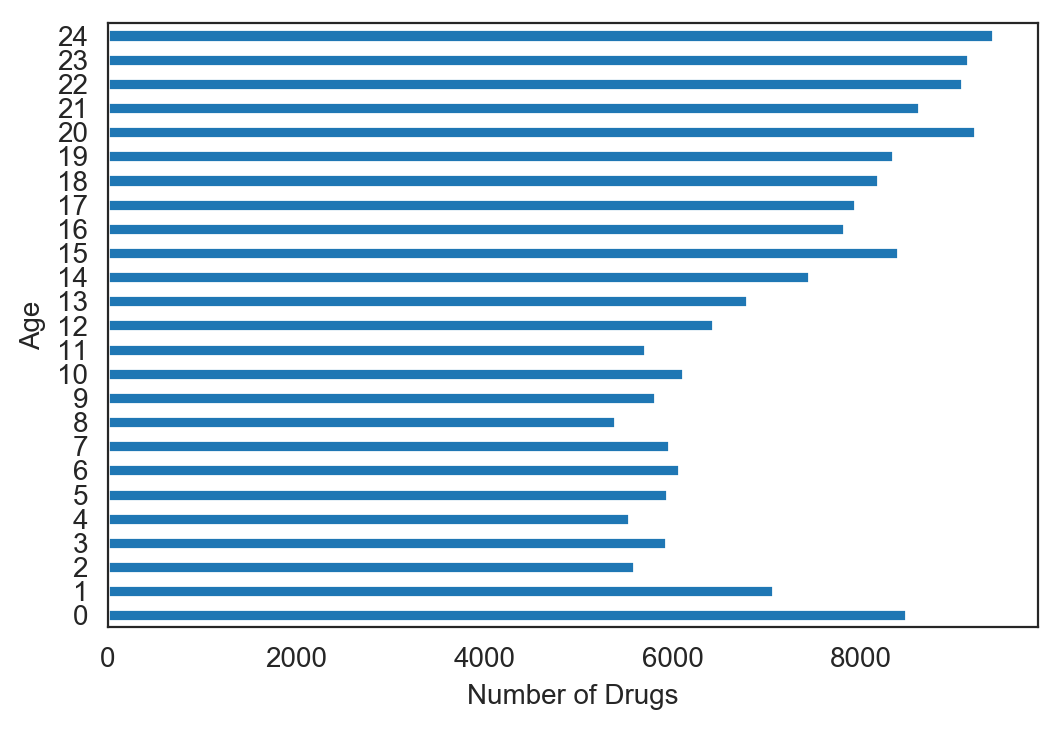

In [80]:
fig,ax = plt.subplots(dpi=200)
(pediatric_patient_drugs.
 loc[:,['year','RxNorm_concept_id']].
 drop_duplicates().
 groupby('year')['RxNorm_concept_id'].
 count()
).plot.barh(ax=ax)
ax.set_xlabel('Number of Drugs')
ax.set_ylabel('Age')


In [81]:
del pediatric_patient_drugs
del pediatric_standard_drugs
del pediatric_patients

## NReactions across Childhood

In [82]:
pediatric_patients = (pd.
            read_csv('../../data/openFDA_drug_event/er_tables/patient.csv.gzip',
                     compression='gzip',
                     index_col=0)
           ).query('patient_custom_master_age<25')
pediatric_patients.head()

,safetyreportid,patient_onsetage,patient_onsetageunit,patient_custom_master_age,patient_sex,patient_weight
39,10003340,22.0,Year,22.0,Female,NaN
56,10003357,10.0,Year,10.0,Male,28.0
86,10003388,19.0,Year,19.0,Female,NaN
99,10003401,18.0,Year,18.0,Female,NaN
128,10003430,10.0,Year,10.0,Male,NaN


In [83]:
ped_reports = pediatric_patients.safetyreportid.astype(str).unique()
len(ped_reports)

553788

In [84]:
pediatric_standard_reactions = (pd.
                  read_csv('../../data/openFDA_drug_event/er_tables/standard_reactions.csv.gzip',
                           compression='gzip',
                           index_col=0)
                      ).query('safetyreportid in @ped_reports')
pediatric_standard_reactions.safetyreportid = pediatric_standard_reactions.safetyreportid.astype(str) 
pediatric_standard_reactions.MedDRA_concept_id = pediatric_standard_reactions.MedDRA_concept_id.astype(int)
pediatric_standard_reactions.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MedDRA_concept_name,safetyreportid,reaction_outcome,MedDRA_concept_id,MedDRA_concept_code,MedDRA_concept_class_id
9,17 Ketosteroids Urine Decreased,9602484,Recovering/resolving,36312357,10000007,PT
11,17-Hydroxyprogesterone Decreased,13096952,NaN,36312139,10063264,PT
12,17-Hydroxyprogesterone Decreased,13282231,Recovering/resolving,36312139,10063264,PT
14,17-Hydroxyprogesterone Increased,10723227,Recovered/resolved,36312140,10063263,PT
16,17-Hydroxyprogesterone Increased,12428891,Unknown,36312140,10063263,PT


In [85]:
pediatric_patient_reactions = (pediatric_patients.
                           loc[:,['patient_custom_master_age','safetyreportid']].
                           drop_duplicates().
                           set_index('safetyreportid').
                           join(pediatric_standard_reactions.
                                set_index('safetyreportid')
                               ).
                           dropna()
                          )
pediatric_patient_reactions.MedDRA_concept_id = pediatric_patient_reactions.MedDRA_concept_id.astype(int)
pediatric_patient_reactions.MedDRA_concept_code = pediatric_patient_reactions.MedDRA_concept_code.astype(int)
pediatric_patient_reactions['year'] = np.floor(pediatric_patient_reactions.patient_custom_master_age).astype(int)
pediatric_patient_reactions.head()

,patient_custom_master_age,MedDRA_concept_name,reaction_outcome,MedDRA_concept_id,MedDRA_concept_code,MedDRA_concept_class_id,year
safetyreportid,,,,,,,
16103222,19.0,Dizziness,Not recovered/not resolved,35205025,10013573,PT,19
16103222,19.0,Duodenal Ulcer,Recovering/resolving,35708270,10013836,PT,19
16103222,19.0,Faeces Discoloured,Recovering/resolving,35708147,10016100,PT,19
16103222,19.0,Malaise,Not recovered/not resolved,35809079,10025482,PT,19
16103257,24.0,Contusion,Unknown,36211385,10050584,PT,24


Text(0, 0.5, 'Age')

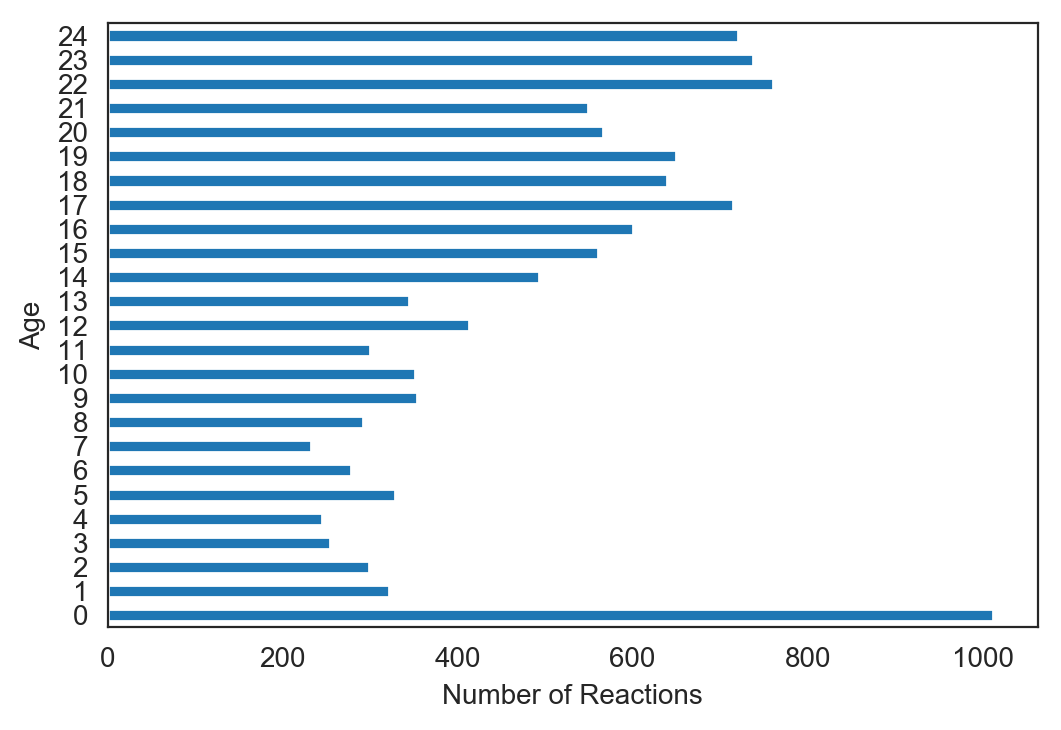

In [86]:
fig,ax = plt.subplots(dpi=200)
(pediatric_patient_reactions.
 loc[:,['year','MedDRA_concept_id']].
 drop_duplicates().
 groupby('year')['MedDRA_concept_id'].
 count()
).plot.barh(ax=ax)
ax.set_xlabel('Number of Reactions')
ax.set_ylabel('Age')

In [65]:
del pediatric_patient_drugs
del pediatric_standard_drugs
del pediatric_patients

## Medicinal product frequency across childhood

In [33]:
df = (pediatric_patient_df.
 set_index('safetyreportid').
 join(
     pediatric_patient_drug_df.
     set_index('safetyreportid')
 ).
 loc[:,['master_age','medicinalproduct']].
      query('master_age<18')
)
df['master_age'] = np.floor(df['master_age'])
df['mem'] = 1.
medproduct_freq_in_childhood = df.pivot_table(index='master_age',columns='medicinalproduct',
                          values='mem',aggfunc=sum,fill_value=0)
cols = medproduct_freq_in_childhood.columns[medproduct_freq_in_childhood.sum(axis=0)>medproduct_freq_in_childhood.shape[0]]
display(medproduct_freq_in_childhood[cols])

medicinalproduct,(METHOTREXATE),.,..,0.9% SODIUM CHLORIDE INJECTION,1 CONCOMITANT DRUG,20% MANNITOL INJECTION,5% GLUCOSE INJECTION,5-AMINOSALICYLIC ACID,5-ASA,5-FLUOROURACIL,...,ZYLORIC,ZYMAD,ZYPREXA,ZYPREXA ZYDIS,ZYRTEC,ZYRTEC 10MG IR TABLET,ZYRTEC-D,ZYVOX,ZYVOXID,[THERAPY UNSPECIFIED]
master_age,,,,,,,,,,,,,,,,,,,,,
0.0,1,7,2,12,3,1,6,2,0,2,...,1,12,125,2,84,0,0,21,4,7
1.0,0,4,2,11,0,0,3,0,0,2,...,1,1,15,0,123,0,0,10,1,5
2.0,1,3,0,11,4,0,4,0,2,4,...,1,0,6,0,171,2,0,4,2,3
3.0,0,3,1,2,0,2,5,0,2,0,...,4,0,10,0,160,2,0,8,1,3
4.0,1,1,1,2,0,0,3,0,3,1,...,2,0,9,1,167,0,0,5,0,5
5.0,1,3,0,6,4,3,1,0,15,0,...,2,0,20,0,184,0,0,6,3,4
6.0,1,5,1,0,2,0,0,0,7,0,...,1,0,32,2,235,0,0,7,0,3
7.0,3,3,2,2,1,2,0,0,6,0,...,0,0,31,3,201,0,0,8,1,1
8.0,1,2,2,1,1,3,0,3,13,1,...,2,0,45,2,232,0,2,12,3,2


## Drug administration route distribution

In [16]:
patient_drug_df = (pd.read_csv('../../data/openFDA_drug_event/er_tables/drugcharacteristics.csv.gzip',
                       compression='gzip',index_col=0))

In [17]:
patient_drug_df.head()

,safetyreportid,medicinal_product,drug_characterization,drug_administration
0,10003300,BONIVA,Suspect (the drug was considered by the report...,Intravenous (not otherwise specified)
1,10003301,IBUPROFEN,Suspect (the drug was considered by the report...,NaN
2,10003302,LYRICA,Suspect (the drug was considered by the report...,NaN
3,10003304,ASPIRIN,Suspect (the drug was considered by the report...,NaN
4,10003304,CODEINE,Suspect (the drug was considered by the report...,NaN


In [18]:
drug_route_counts = np.unique(patient_drug_df['drug_administration'].dropna().values,return_counts=True)

In [19]:
print(drug_route_counts)
len(drug_route_counts[0])

(array(['Auricular (otic)', 'Buccal', 'Cutaneous', 'Dental',
       'Endocervical', 'Endosinusial', 'Endotracheal', 'Epidural',
       'Extra-amniotic', 'Hemodialysis', 'Intra corpus cavernosum',
       'Intra-amniotic', 'Intra-arterial', 'Intra-articular',
       'Intra-uterine', 'Intracardiac', 'Intracavernous', 'Intracerebral',
       'Intracervical', 'Intracisternal', 'Intracorneal', 'Intracoronary',
       'Intradermal', 'Intradiscal (intraspinal)', 'Intrahepatic',
       'Intralesional', 'Intralymphatic', 'Intramedullar (bone marrow)',
       'Intrameningeal', 'Intramuscular', 'Intraocular',
       'Intrapericardial', 'Intraperitoneal', 'Intrapleural',
       'Intrasynovial', 'Intrathecal', 'Intrathoracic', 'Intratracheal',
       'Intratumor', 'Intravenous (not otherwise specified)',
       'Intravenous bolus', 'Intravenous drip', 'Intravesical',
       'Iontophoresis', 'Nasal', 'Occlusive dressing technique',
       'Ophthalmic', 'Oral', 'Oropharingeal', 'Other', 'Parenteral',


67

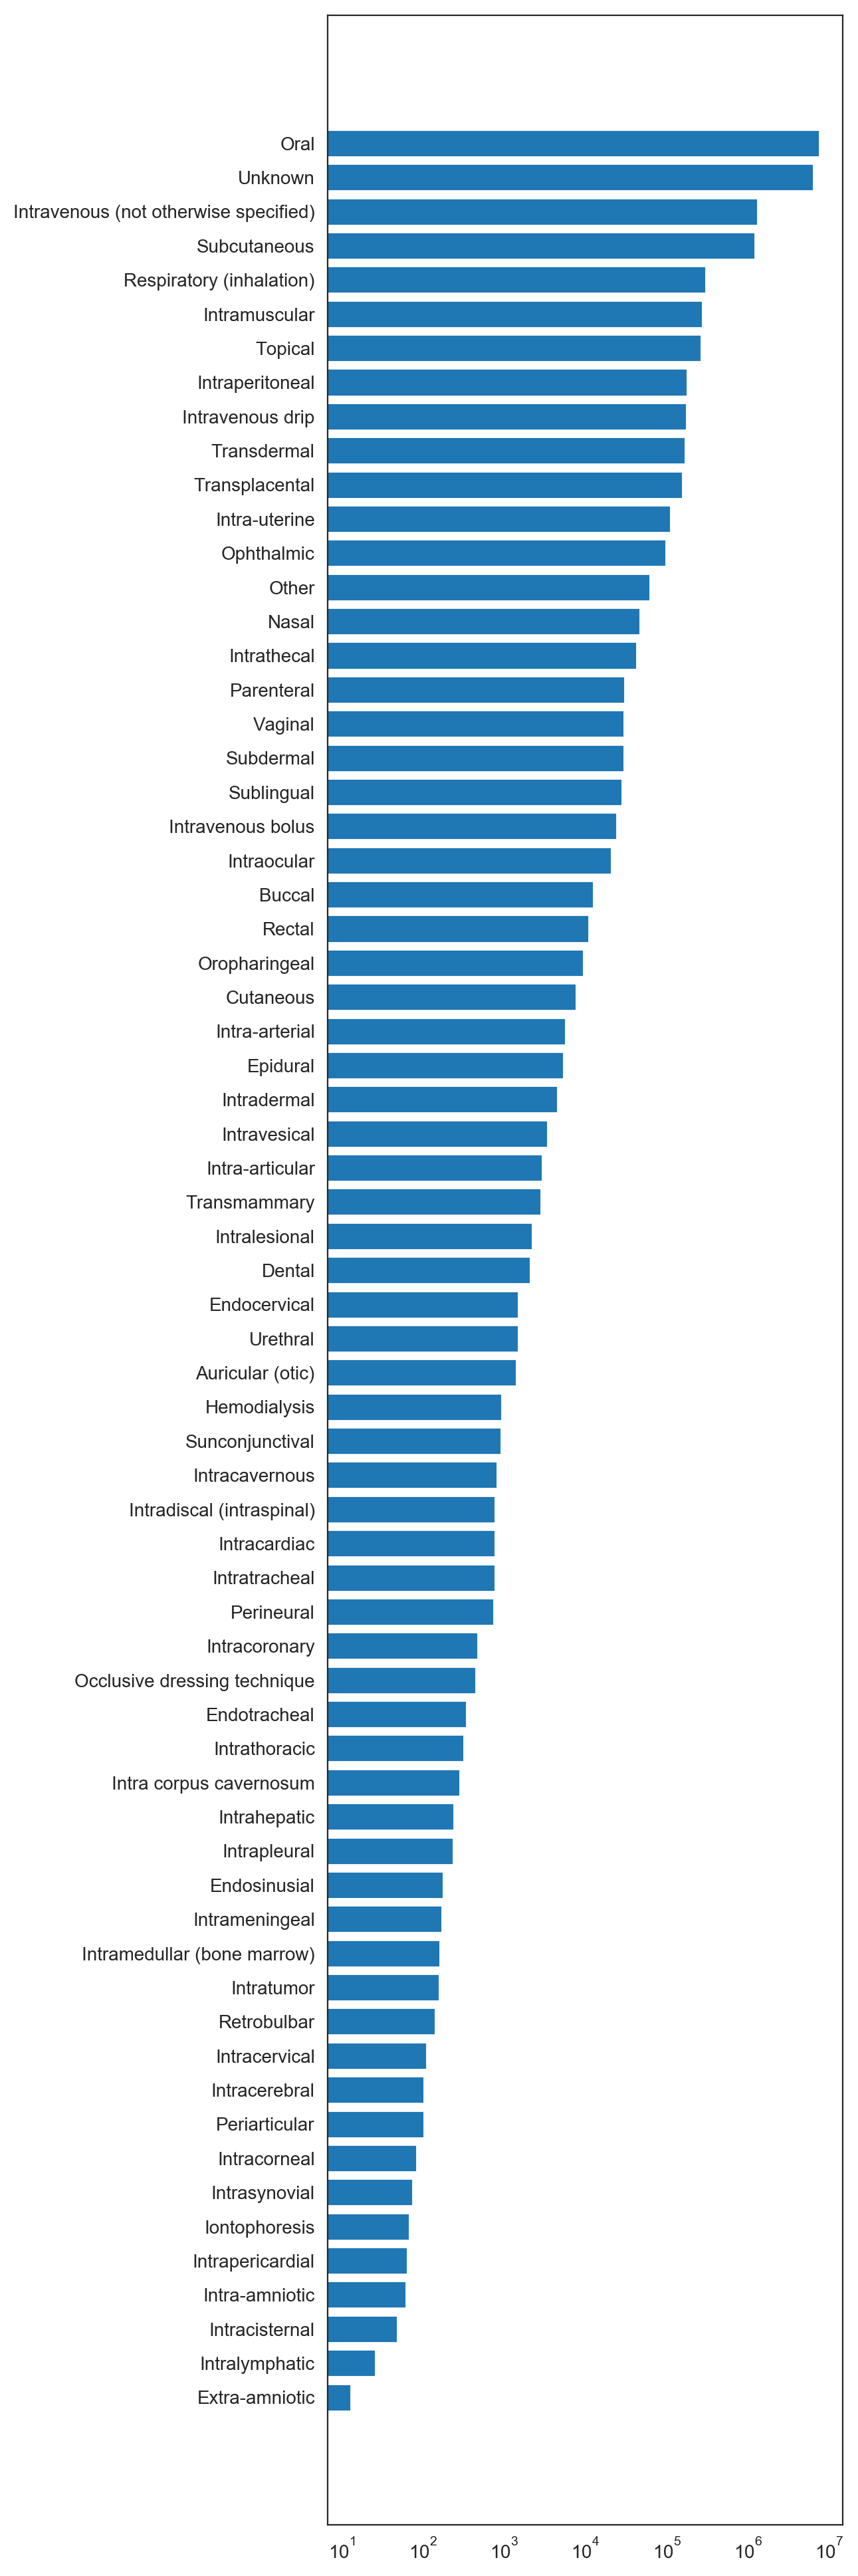

In [20]:
plt.figure(figsize=(5,25),dpi=200)
order = drug_route_counts[1].argsort()
plt.barh(drug_route_counts[0][order],drug_route_counts[1][order])
plt.xscale('log')